In [130]:
%%capture
!pip install ucimlrepo
!pip install dcor

In [131]:
%%capture
# Have to restart the kernel after running this
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [132]:
# Juliet's imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dcor
from datetime import datetime
from ydata_profiling import ProfileReport
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate

In [133]:
# Albert's imports
import tensorflow as tf

In [134]:
# Fetch dataset from UCI repo
bike_sharing_dataset = fetch_ucirepo(id=275)

# Print variable info
with pd.option_context('display.max_colwidth', None):
  print(bike_sharing_dataset.variables)

# Get full dataset as a dataframe
bike_sharing_df = bike_sharing_dataset.data.original

          name     role         type demographic  \
0      instant       ID      Integer        None   
1       dteday  Feature         Date        None   
2       season  Feature  Categorical        None   
3           yr  Feature  Categorical        None   
4         mnth  Feature  Categorical        None   
5           hr  Feature  Categorical        None   
6      holiday  Feature       Binary        None   
7      weekday  Feature  Categorical        None   
8   workingday  Feature       Binary        None   
9   weathersit  Feature  Categorical        None   
10        temp  Feature   Continuous        None   
11       atemp  Feature   Continuous        None   
12         hum  Feature   Continuous        None   
13   windspeed  Feature   Continuous        None   
14      casual    Other      Integer        None   
15  registered    Other      Integer        None   
16         cnt   Target      Integer        None   

                                                               

In [135]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [136]:
bike_sharing_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [137]:
bike_sharing_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [138]:
# Examine unique values for each category
for col in ['season', 'mnth', 'hr', 'weekday', 'weathersit']:
  print(f'Category: {col}')
  print(f'Values: {bike_sharing_df[col].unique()}')

Category: season
Values: [1 2 3 4]
Category: mnth
Values: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Category: hr
Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Category: weekday
Values: [6 0 1 2 3 4 5]
Category: weathersit
Values: [1 2 3 4]


In [139]:
# Shift categorical variables to start at 0
bike_sharing_df['season'] = bike_sharing_df['season'] - 1
bike_sharing_df['mnth'] = bike_sharing_df['mnth'] - 1
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'] - 1

In [141]:
# Convert categorical variables to be of type category
bike_sharing_df['hr'] = bike_sharing_df['hr'].astype('category')
bike_sharing_df['mnth'] = bike_sharing_df['mnth'].astype('category')
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].astype('category')
bike_sharing_df['season'] = bike_sharing_df['season'].astype('category')
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].astype('category')

In [146]:
# Drop instant because it is an ID
bike_sharing_df.drop(columns=['instant'], axis=1, inplace=True)

# Drop yr because it only tells us if the year is 2011 or 2012
bike_sharing_df.drop(columns=['yr'], axis=1, inplace=True)

In [147]:
# Create a new datetime column
def getdatetime(row):
    year, month, day = row[0].split('-')
    hour = row[1]
    return datetime(int(year), int(month), int(day), int(hour))

bike_sharing_df['datetime'] = bike_sharing_df[['dteday', 'hr']].apply(getdatetime, axis=1)

In [148]:
# Introduce a new feature that represents the ratio of casual to registered users
bike_sharing_df['casual_vs_registered'] = bike_sharing_df['casual']/bike_sharing_df['registered']

In [149]:
# Check distribution for new variable
print(bike_sharing_df['casual_vs_registered'].describe())

count    1.737900e+04
mean              inf
std               NaN
min      0.000000e+00
25%      6.779661e-02
50%      1.721854e-01
75%      3.400000e-01
max               inf
Name: casual_vs_registered, dtype: float64


In [150]:
# Handle cases where either casual or registered is 0 by replacing with 1s
casual_temp = bike_sharing_df['casual'].replace(0, 1)
registered_temp = bike_sharing_df['registered'].replace(0, 1)

bike_sharing_df['casual_vs_registered'] = casual_temp/registered_temp
bike_sharing_df['log_casual_vs_registered'] = np.log1p(bike_sharing_df['casual_vs_registered'])

count    17379.000000
mean         0.272440
std          0.283652
min          0.002237
25%          0.091500
50%          0.194030
75%          0.358491
max          7.000000
Name: casual_vs_registered, dtype: float64
count    17379.000000
mean         0.222583
std          0.180896
min          0.002235
25%          0.087553
50%          0.177334
75%          0.306374
max          2.079442
Name: log_casual_vs_registered, dtype: float64


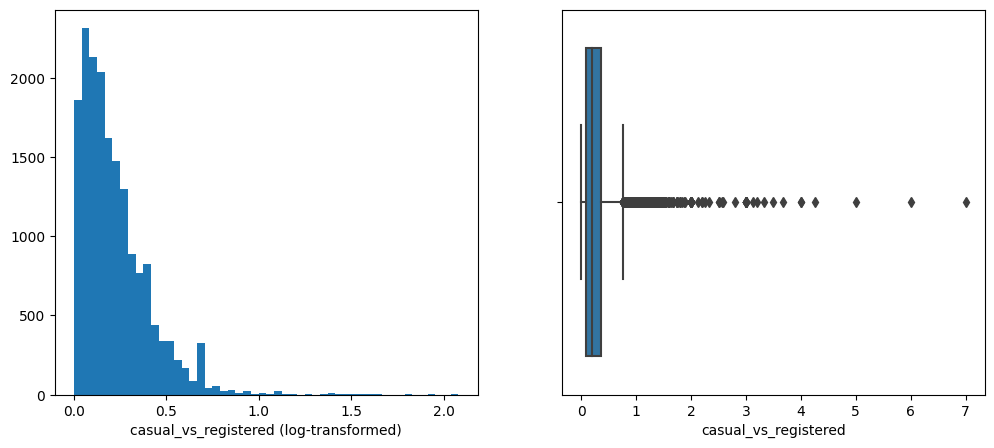

In [151]:
# Reinspect distribution
print(bike_sharing_df['casual_vs_registered'].describe())
print(bike_sharing_df['log_casual_vs_registered'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(bike_sharing_df['log_casual_vs_registered'], bins=50)
ax1.set_xlabel('casual_vs_registered (log-transformed)')

sns.boxplot(x=bike_sharing_df['casual_vs_registered'], ax=ax2)
plt.show()

In [152]:
# Examine data after changes
bike_sharing_df.head()

dteday season mnth hr  holiday weekday  workingday weathersit  temp  \
0  2011-01-01      0    0  0        0       6           0          0  0.24   
1  2011-01-01      0    0  1        0       6           0          0  0.22   
2  2011-01-01      0    0  2        0       6           0          0  0.22   
3  2011-01-01      0    0  3        0       6           0          0  0.24   
4  2011-01-01      0    0  4        0       6           0          0  0.24   

    atemp   hum  windspeed  casual  registered  cnt  casual_vs_registered  \
0  0.2879  0.81        0.0       3          13   16              0.230769   
1  0.2727  0.80        0.0       8          32   40              0.250000   
2  0.2727  0.80        0.0       5          27   32              0.185185   
3  0.2879  0.75        0.0       3          10   13              0.300000   
4  0.2879  0.75        0.0       0           1    1              1.000000   

   log_casual_vs_registered            datetime  
0                  0.207639 2011-01-01 00:00:00  
1                  0.223144 2011-01-01 01:00:00  
2                  0.169899 2011-01-01 02:00:00  
3                  0.262364 2011-01-01 03:00:00  
4                  0.693147 2011-01-01 04:00:00

In [153]:
# Generate profiling report on the cleaned data
profile = ProfileReport(bike_sharing_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [154]:
profile.to_file('./bike-sharing-profile.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [155]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   dteday                    17379 non-null  object        
 1   season                    17379 non-null  category      
 2   mnth                      17379 non-null  category      
 3   hr                        17379 non-null  category      
 4   holiday                   17379 non-null  int64         
 5   weekday                   17379 non-null  category      
 6   workingday                17379 non-null  int64         
 7   weathersit                17379 non-null  category      
 8   temp                      17379 non-null  float64       
 9   atemp                     17379 non-null  float64       
 10  hum                       17379 non-null  float64       
 11  windspeed                 17379 non-null  float64       
 12  casual            

In [156]:
# One hot encode categorical features
dummies = pd.get_dummies(bike_sharing_df[['season', 'mnth', 'hr', 'weekday', 'weathersit']], drop_first=False)
bike_sharing_df = pd.concat([bike_sharing_df, dummies], axis=1)

In [157]:
bike_sharing_df.head()

dteday season mnth hr  holiday weekday  workingday weathersit  temp  \
0  2011-01-01      0    0  0        0       6           0          0  0.24   
1  2011-01-01      0    0  1        0       6           0          0  0.22   
2  2011-01-01      0    0  2        0       6           0          0  0.22   
3  2011-01-01      0    0  3        0       6           0          0  0.24   
4  2011-01-01      0    0  4        0       6           0          0  0.24   

    atemp  ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0  0.2879  ...          0          0          0          0          0   
1  0.2727  ...          0          0          0          0          0   
2  0.2727  ...          0          0          0          0          0   
3  0.2879  ...          0          0          0          0          0   
4  0.2879  ...          0          0          0          0          0   

   weekday_6  weathersit_0 weathersit_1  weathersit_2  weathersit_3  
0          1             1            0             0             0  
1          1             1            0             0             0  
2          1             1            0             0             0  
3          1             1            0             0             0  
4          1             1            0             0             0  

[5 rows x 69 columns]

In [158]:
bike_sharing_df.columns

Index(['dteday', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'casual_vs_registered', 'log_casual_vs_registered',
       'datetime', 'season_0', 'season_1', 'season_2', 'season_3', 'mnth_0',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_0', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
# Distance correlation for casual and continuous independent variables
print("Correlations for casual:")
print(f"Correlation for temp and casual: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['casual'])}")

print(f"Correlation for atemp and casual: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['casual'])}")

print(f"Correlation for hum and casual: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['casual'])}")

print(f"Correlation for windspeed and casual: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['casual'])}")

# Distance correlation for registered and continuous independent variables
print("Correlations for registered:")
print(f"Correlation for temp and registered: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['registered'])}")

print(f"Correlation for atemp and registered: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['registered'])}")

print(f"Correlation for hum and registered: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['registered'])}")

print(f"Correlation for windspeed and registered: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['registered'])}")

# Distance correlation for cnt and continuous independent variables
print("Correlations for cnt:")
print(f"Correlation for temp and cnt: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['cnt'])}")

print(f"Correlation for atemp and cnt: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['cnt'])}")

print(f"Correlation for hum and cnt: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['cnt'])}")

print(f"Correlation for windspeed and cnt: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['cnt'])}")

# Distance correlation for casual_vs_registered and continuous independent variables
print("Correlations for casual_vs_registered:")
print(f"Correlation for temp and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['casual_vs_registered'])}")

print(f"Correlation for atemp and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['casual_vs_registered'])}")

print(f"Correlation for hum and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['casual_vs_registered'])}")

print(f"Correlation for windspeed and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['casual_vs_registered'])}")

Correlations for casual:


/usr/local/lib/python3.10/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dcor/_dcor_internals.py:188: RuntimeWarning: overflow encountered in long_scalars
  third_term = a_total_sum * b_total_sum / n_samples


Correlation for temp and casual: 0.4381158070343228
Correlation for atemp and casual: 0.43990207507786117
Correlation for hum and casual: 0.3129375639572588
Correlation for windspeed and casual: 0.09809134516206383
Correlations for registered:
Correlation for temp and registered: 0.2894652469831514
Correlation for atemp and registered: 0.292248937599841
Correlation for hum and registered: 0.25670994855052054
Correlation for windspeed and registered: 0.09102353010983961
Correlations for cnt:
Correlation for temp and cnt: 0.344684563080449
Correlation for atemp and cnt: 0.3476517748735718
Correlation for hum and cnt: 0.2840572726062154
Correlation for windspeed and cnt: 0.09726780617032511
Correlations for casual_vs_registered:
Correlation for temp and casual_vs_registered: 0.3095473112002956
Correlation for atemp and casual_vs_registered: 0.3112230308321759
Correlation for hum and casual_vs_registered: 0.1152993234228237
Correlation for windspeed and casual_vs_registered: 0.023171836523

Time Series CNN:

In [159]:
bike_sharing_df

dteday season mnth  hr  holiday weekday  workingday weathersit  \
0      2011-01-01      0    0   0        0       6           0          0   
1      2011-01-01      0    0   1        0       6           0          0   
2      2011-01-01      0    0   2        0       6           0          0   
3      2011-01-01      0    0   3        0       6           0          0   
4      2011-01-01      0    0   4        0       6           0          0   
...           ...    ...  ...  ..      ...     ...         ...        ...   
17374  2012-12-31      0   11  19        0       1           1          1   
17375  2012-12-31      0   11  20        0       1           1          1   
17376  2012-12-31      0   11  21        0       1           1          0   
17377  2012-12-31      0   11  22        0       1           1          0   
17378  2012-12-31      0   11  23        0       1           1          0   

       temp   atemp  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0      0.24  0.2879  ...          0          0          0          0   
1      0.22  0.2727  ...          0          0          0          0   
2      0.22  0.2727  ...          0          0          0          0   
3      0.24  0.2879  ...          0          0          0          0   
4      0.24  0.2879  ...          0          0          0          0   
...     ...     ...  ...        ...        ...        ...        ...   
17374  0.26  0.2576  ...          1          0          0          0   
17375  0.26  0.2576  ...          1          0          0          0   
17376  0.26  0.2576  ...          1          0          0          0   
17377  0.26  0.2727  ...          1          0          0          0   
17378  0.26  0.2727  ...          1          0          0          0   

       weekday_5  weekday_6  weathersit_0 weathersit_1  weathersit_2  \
0              0          1             1            0             0   
1              0          1             1            0             0   
2              0          1             1            0             0   
3              0          1             1            0             0   
4              0          1             1            0             0   
...          ...        ...           ...          ...           ...   
17374          0          0             0            1             0   
17375          0          0             0            1             0   
17376          0          0             1            0             0   
17377          0          0             1            0             0   
17378          0          0             1            0             0   

       weathersit_3  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
17374             0  
17375             0  
17376             0  
17377             0  
17378             0  

[17379 rows x 69 columns]

In [160]:
time_series_df = bike_sharing_df

In [161]:
time_series_df.dtypes

dteday            object
season          category
mnth            category
hr              category
holiday            int64
                  ...   
weekday_6          uint8
weathersit_0       uint8
weathersit_1       uint8
weathersit_2       uint8
weathersit_3       uint8
Length: 69, dtype: object

In [162]:
#Get datetime
date_time = pd.to_datetime(time_series_df['datetime'], format='%Y.%m.%d %H:%M:%S')

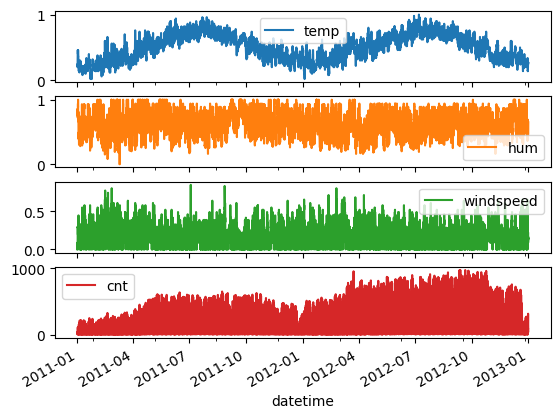

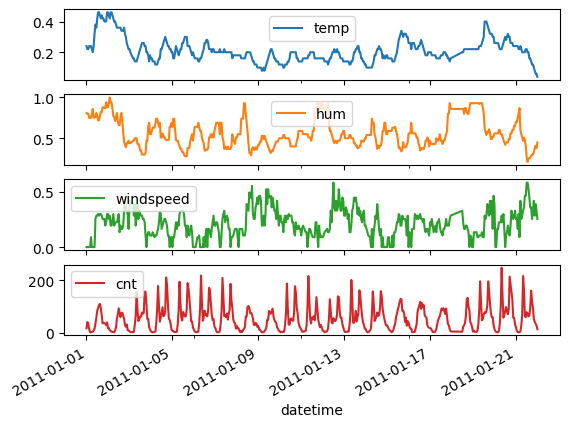

In [163]:
#Feature evolution over time
plot_cols = ['temp', 'hum', 'windspeed', 'cnt']
plot_features = time_series_df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = time_series_df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [164]:
time_series_df.describe().transpose()

count      mean       std   min     25%     50%     75%  max
holiday       17379.0  0.028770  0.167165  0.00  0.0000  0.0000  0.0000  1.0
workingday    17379.0  0.682721  0.465431  0.00  0.0000  1.0000  1.0000  1.0
temp          17379.0  0.496987  0.192556  0.02  0.3400  0.5000  0.6600  1.0
atemp         17379.0  0.475775  0.171850  0.00  0.3333  0.4848  0.6212  1.0
hum           17379.0  0.627229  0.192930  0.00  0.4800  0.6300  0.7800  1.0
...               ...       ...       ...   ...     ...     ...     ...  ...
weekday_6     17379.0  0.144542  0.351649  0.00  0.0000  0.0000  0.0000  1.0
weathersit_0  17379.0  0.656712  0.474820  0.00  0.0000  1.0000  1.0000  1.0
weathersit_1  17379.0  0.261465  0.439445  0.00  0.0000  0.0000  1.0000  1.0
weathersit_2  17379.0  0.081650  0.273839  0.00  0.0000  0.0000  0.0000  1.0
weathersit_3  17379.0  0.000173  0.013138  0.00  0.0000  0.0000  0.0000  1.0

[62 rows x 8 columns]

In [165]:
#Convert timestamp to seconds
time_series_df['timestamp'] = date_time.map(pd.Timestamp.timestamp)

In [166]:
time_series_df['timestamp']

0        1.293840e+09
1        1.293844e+09
2        1.293847e+09
3        1.293851e+09
4        1.293854e+09
             ...     
17374    1.356980e+09
17375    1.356984e+09
17376    1.356988e+09
17377    1.356991e+09
17378    1.356995e+09
Name: timestamp, Length: 17379, dtype: float64

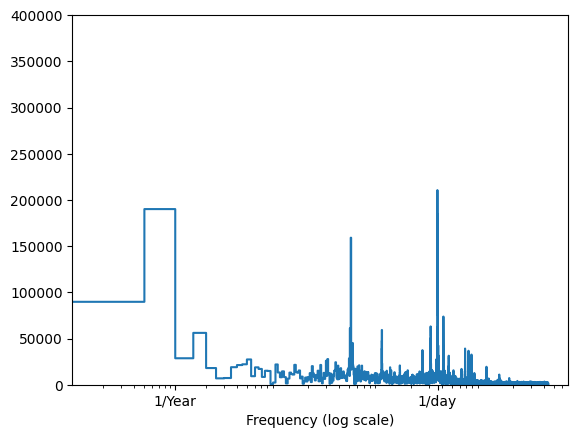

In [167]:
#Fast fourier transform: feature frequency
fft = tf.signal.rfft(time_series_df['casual'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(time_series_df['temp'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

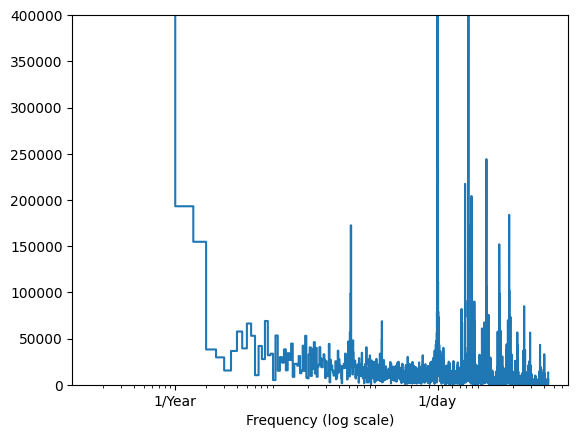

In [168]:
fft = tf.signal.rfft(time_series_df['registered'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(time_series_df['temp'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [169]:
#Split data 70% training, 20% validation, 10% testing
column_indices = {name: i for i, name in enumerate(time_series_df.columns)}

n = len(time_series_df)
train_df = time_series_df[0:int(n*0.7)]
val_df = time_series_df[int(n*0.7):int(n*0.9)]
test_df = time_series_df[int(n*0.9):]

num_features = time_series_df.shape[1]

In [170]:
time_series_df = time_series_df.drop(['dteday'], axis=1)
time_series_df.dtypes

season          category
mnth            category
hr              category
holiday            int64
weekday         category
                  ...   
weathersit_0       uint8
weathersit_1       uint8
weathersit_2       uint8
weathersit_3       uint8
timestamp        float64
Length: 69, dtype: object

In [171]:
time_series_df

season mnth  hr  holiday weekday  workingday weathersit  temp   atemp  \
0          0    0   0        0       6           0          0  0.24  0.2879   
1          0    0   1        0       6           0          0  0.22  0.2727   
2          0    0   2        0       6           0          0  0.22  0.2727   
3          0    0   3        0       6           0          0  0.24  0.2879   
4          0    0   4        0       6           0          0  0.24  0.2879   
...      ...  ...  ..      ...     ...         ...        ...   ...     ...   
17374      0   11  19        0       1           1          1  0.26  0.2576   
17375      0   11  20        0       1           1          1  0.26  0.2576   
17376      0   11  21        0       1           1          0  0.26  0.2576   
17377      0   11  22        0       1           1          0  0.26  0.2727   
17378      0   11  23        0       1           1          0  0.26  0.2727   

        hum  ...  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
0      0.81  ...          0          0          0          0          1   
1      0.80  ...          0          0          0          0          1   
2      0.80  ...          0          0          0          0          1   
3      0.75  ...          0          0          0          0          1   
4      0.75  ...          0          0          0          0          1   
...     ...  ...        ...        ...        ...        ...        ...   
17374  0.60  ...          0          0          0          0          0   
17375  0.60  ...          0          0          0          0          0   
17376  0.60  ...          0          0          0          0          0   
17377  0.56  ...          0          0          0          0          0   
17378  0.65  ...          0          0          0          0          0   

       weathersit_0 weathersit_1  weathersit_2  weathersit_3     timestamp  
0                 1            0             0             0  1.293840e+09  
1                 1            0             0             0  1.293844e+09  
2                 1            0             0             0  1.293847e+09  
3                 1            0             0             0  1.293851e+09  
4                 1            0             0             0  1.293854e+09  
...             ...          ...           ...           ...           ...  
17374             0            1             0             0  1.356980e+09  
17375             0            1             0             0  1.356984e+09  
17376             1            0             0             0  1.356988e+09  
17377             1            0             0             0  1.356991e+09  
17378             1            0             0             0  1.356995e+09  

[17379 rows x 69 columns]

In [ ]:
# #Data normalization
# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

In [174]:
# Select features for the model
features = [
    'holiday',
    'workingday',
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'season_0',
    'season_1',
    'season_2',
    'season_3',
    'mnth_0',
    'mnth_1',
    'mnth_2',
    'mnth_3',
    'mnth_4',
    'mnth_5',
    'mnth_6',
    'mnth_7',
    'mnth_8',
    'mnth_9',
    'mnth_10',
    'mnth_11',
    'hr_0',
    'hr_1',
    'hr_2',
    'hr_3',
    'hr_4',
    'hr_5',
    'hr_6',
    'hr_7',
    'hr_8',
    'hr_9',
    'hr_10',
    'hr_11',
    'hr_12',
    'hr_13',
    'hr_14',
    'hr_15',
    'hr_16',
    'hr_17',
    'hr_18',
    'hr_19',
    'hr_20',
    'hr_21',
    'hr_22',
    'hr_23',
    'weekday_0',
    'weekday_1',
    'weekday_2',
    'weekday_3',
    'weekday_4',
    'weekday_5',
    'weekday_6',
    'weathersit_0',
    'weathersit_1',
    'weathersit_2',
    'weathersit_3'
]

features_nonlinear = [
    'holiday',
    'workingday',
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'season',
    'hr',
    'mnth',
    'weekday',
    'weathersit'
]

numerical_features = [
    'holiday',
    'workingday',
    'temp',
    'atemp',
    'hum',
    'windspeed',
]

In [175]:
# Create a linear regression model as a baseline
X = bike_sharing_df[features]
y = bike_sharing_df['casual_vs_registered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(f'R squared score: {regr.score(X_test, y_test)}')

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R squared score: 0.29230262112339445
Mean Squared Error: 0.0586590961720981


In [176]:
# Create a linear regression model as a baseline using log transformed variable
X = bike_sharing_df[features]
y = bike_sharing_df['log_casual_vs_registered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(f'R squared score: {regr.score(X_test, y_test)}')

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R squared score: 0.38872544016596633
Mean Squared Error: 0.020473070039186022


In [177]:
# Create embeddings for categorical features
season_input = Input(shape=(1,), name='season')
hr_input = Input(shape=(1,), name='hr')
mnth_input = Input(shape=(1,), name='mnth')
weekday_input = Input(shape=(1,), name='weekday')
weathersit_input = Input(shape=(1,), name='weathersit')

season_embedding = Flatten()(Embedding(input_dim=4, output_dim=2, name='season_embedding')(season_input))
hr_embedding = Flatten()(Embedding(input_dim=24, output_dim=8, name='hr_embedding')(hr_input))
mnth_embedding = Flatten()(Embedding(input_dim=12, output_dim=4, name='mnth_embedding')(mnth_input))
weekday_embedding = Flatten()(Embedding(input_dim=7, output_dim=4, name='weekday_embedding')(weekday_input))
weathersit_embedding = Flatten()(Embedding(input_dim=4, output_dim=2, name='weathersit_embedding')(weathersit_input))

# Define input for non-categorical features
numerical_input = Input(shape=(len(numerical_features),), name='numerical')

# Combine all input features
all_features = Concatenate()([
    season_embedding,
    hr_embedding,
    mnth_embedding,
    weekday_embedding,
    weathersit_embedding,
    numerical_input
])

# Define model layers
layer1 = Dense(128, activation='relu')(all_features)
output = Dense(1)(layer1)

model = Model(
    inputs=[
        season_input,
        hr_input,
        mnth_input,
        weekday_input,
        weathersit_input,
        numerical_input
    ],
    outputs=output
)

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 season (InputLayer)         [(None, 1)]                  0         []                            
                                                                                                  
 hr (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 mnth (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 weekday (InputLayer)        [(None, 1)]                  0         []                            
                                                                                            

In [178]:
X = bike_sharing_df[features_nonlinear]
y = bike_sharing_df['casual_vs_registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train[numerical_features].head()

# Fit the model
history = model.fit(
    [X_train['season'],
     X_train['hr'],
     X_train['mnth'],
     X_train['weekday'],
     X_train['weathersit'],
     X_train[numerical_features]],
    y_train,
    epochs=15,
    validation_split=0.2
)

Epoch 1/15
348/348 [==============================] - 3s 5ms/step - loss: 0.0602 - val_loss: 0.0522
Epoch 2/15
348/348 [==============================] - 1s 4ms/step - loss: 0.0513 - val_loss: 0.0508
Epoch 3/15
348/348 [==============================] - 1s 3ms/step - loss: 0.0490 - val_loss: 0.0479
Epoch 4/15
348/348 [==============================] - 1s 3ms/step - loss: 0.0470 - val_loss: 0.0470
Epoch 5/15
348/348 [==============================] - 1s 3ms/step - loss: 0.0456 - val_loss: 0.0492
Epoch 6/15
348/348 [==============================] - 1s 3ms/step - loss: 0.0451 - val_loss: 0.0458
Epoch 7/15
348/348 [==============================] - 1s 2ms/step - loss: 0.0446 - val_loss: 0.0457
Epoch 8/15
348/348 [==============================] - 1s 3ms/step - loss: 0.0439 - val_loss: 0.0459
Epoch 9/15
348/348 [==============================] - 1s 3ms/step - loss: 0.0436 - val_loss: 0.0450
Epoch 10/15
348/348 [==============================] - 1s 3ms/step - loss: 0.0431 - val_loss: 0.0448

109/109 [==============================] - 0s 3ms/step - loss: 0.0477
MSE: 0.047735027968883514


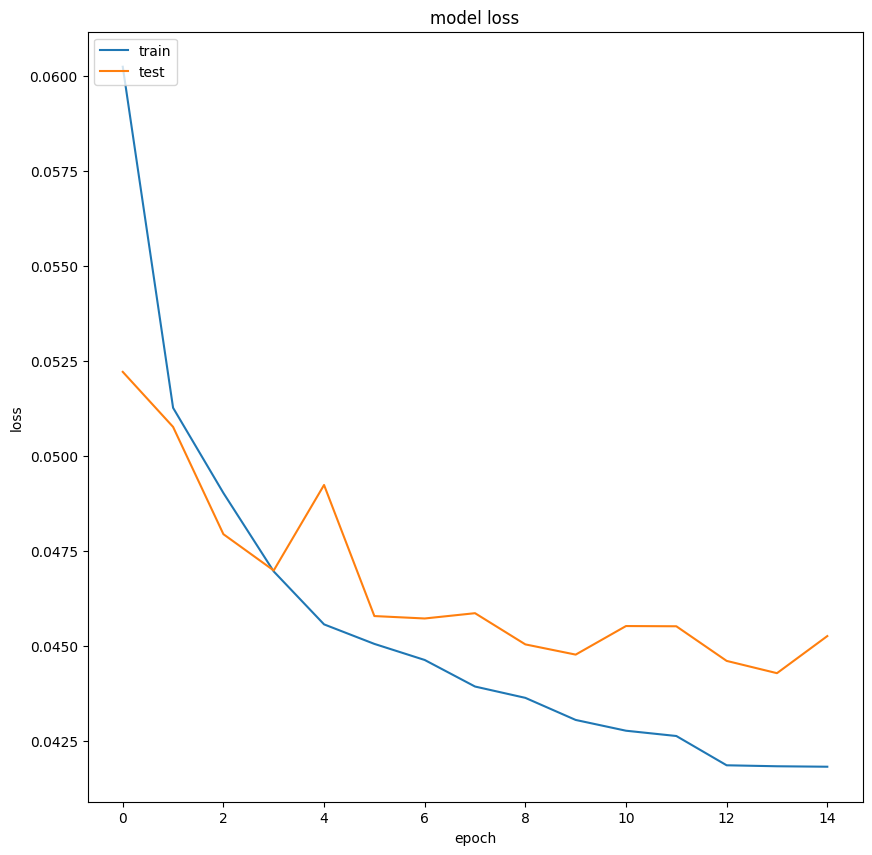

In [179]:
# Evaluate the model
#y_pred = model.predict(X_test)
score = model.evaluate(
    [X_test['season'],
     X_test['hr'],
     X_test['mnth'],
     X_test['weekday'],
     X_test['weathersit'],
     X_test[numerical_features]],
    y_test)
print(f'MSE: {score}')

# Plot learning curves
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()